# Vanilla Neural Network from scratch

# Setup

## Packages


In [1]:
# Data packages
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # To grab the images and extract useful information

# Various scoring metrics from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Other System packages 
import os 
np.random.seed(42) # Set random seed

## Data


Read in the labels and file information

In [2]:
# Set the dataset directory
dataset_dir = os.getcwd() + "/raw_data"

# Get the data labels
labels_file = dataset_dir + "/data_labels.csv"
data_labels = pd.read_csv(labels_file)

# How much data do we have?
print(data_labels.shape)

(4870, 2)


In [3]:
# Get X files
file_list = [dataset_dir + "/" + str(x) + ".png" for x in list(data_labels["id"])]

In [4]:
# Get the labels
data_labels["class"] = np.where(data_labels['label']=='automobile', 1, 0)
data_labels["class"].value_counts() # How many positive cases do we have?

0    4370
1     500
Name: class, dtype: int64

In [5]:
## TO DO ##

# Create a function that will standardise the dataset (Hint: What range are the possible values now?)
# Replace False

def standarise_data(dataset):
    
    new_dataset = dataset / 255  # RGB Channel range from 0-255
    
    return new_dataset

In [6]:
## TO DO ##

# Create a function that will load and split the dataset
# Replace False

def load_data():

    global X_train, X_test, y_train, y_test # input advice from alex
    
    x = np.array([np.array(Image.open(fname)) for fname in file_list])
    y = np.array(data_labels["class"])
    
    # TODO - here you need to split the dataset (use test_train_split). Let's use 30% for the test size.
    X_train, X_test, y_train, y_test = train_test_split( x , y , test_size = 0.30 )
    
    # Here is some reshaping code - don't need to worry about this
    # Though feel free to run different lines to see what is happening!
    y_train = y_train.reshape(1, y_train.shape[0])
    y_test = y_test.reshape(1, y_test.shape[0])
    
    # Reshape the training and test examples 
    X_train_f = X_train.reshape(X_train.shape[0], -1).T
    X_test_f = X_test.reshape(X_test.shape[0], -1).T
    
    ## TODO, call your standardisation function to standardize data to have feature values between 0 and 1.
    X_train = standarise_data(X_train_f)
    X_test = standarise_data(X_test_f)
    

    print ("Flatten X_train: " + str(X_train.shape))
    print ("Flatten X_test: " + str(X_test.shape))
    
    print ("y_train: " + str(y_train.shape))
    print ("y_test: " + str(y_test.shape))
    
    return X_train, X_test, y_train, y_test

In [7]:
# Call the function to load in the data (Can do here - no longer needed as called in big function at the end)
load_data()

Flatten X_train: (3072, 3409)
Flatten X_test: (3072, 1461)
y_train: (1, 3409)
y_test: (1, 1461)


(array([[0.        , 0.48235294, 0.55294118, ..., 1.        , 0.66666667,
         0.01176471],
        [0.        , 0.34901961, 0.65490196, ..., 1.        , 0.69803922,
         0.23137255],
        [0.        , 0.3254902 , 0.8       , ..., 1.        , 0.74509804,
         0.11372549],
        ...,
        [0.01176471, 0.5254902 , 0.39607843, ..., 1.        , 0.74509804,
         0.43137255],
        [0.01960784, 0.4       , 0.38039216, ..., 1.        , 0.6       ,
         0.55294118],
        [0.01176471, 0.38823529, 0.36470588, ..., 1.        , 0.43137255,
         0.30196078]]),
 array([[0.20784314, 0.69411765, 0.44705882, ..., 0.32156863, 0.42352941,
         1.        ],
        [0.2745098 , 0.74117647, 0.38431373, ..., 0.30980392, 0.32941176,
         1.        ],
        [0.20784314, 0.62352941, 0.25882353, ..., 0.29803922, 0.13333333,
         1.        ],
        ...,
        [0.05882353, 0.6       , 0.40392157, ..., 0.70196078, 0.17647059,
         0.9372549 ],
        [0.0

# Classical ML Comparison

Note that the below is only for reference. It will likely take a LONG time to run. Hence only call this for exploratory purposes. Comment out the call below in future runs!

WARNING - THE CODE ALSO uses all CPU's except 1. Run at your own risk!

In [8]:
def run_logistic():
    from sklearn.linear_model import LogisticRegressionCV 
    import datetime
    
    X_train_clf = X_train.T
    X_test_clf = X_test.T

    y_train_clf = y_train.T.ravel()
    y_test_clf = y_test.T.ravel()

    print(X_train_clf.shape, X_test_clf.shape, y_train_clf.shape, y_test_clf.shape)

    C_list = np.linspace(0.001, 0.5, 20)
    
    log_reg = LogisticRegressionCV(
        Cs=C_list, cv=10, penalty='l2', scoring='roc_auc', solver='liblinear', tol =1e-4, max_iter=1000, 
        class_weight='balanced', 
        n_jobs=os.cpu_count() - 1, 
        verbose=2, refit=True, multi_class='ovr', random_state=42
    )

    #Fit to our model
    start = datetime.datetime.now()
    log_reg.fit(X_train_clf, y_train_clf)
    end = datetime.datetime.now()
    
    print("Total time taken: {}".format(end - start))
    
    # Predict the class
    y_test_clf = pd.DataFrame(y_test_clf, columns=["actual"])
    y_test_clf["predictions_lr"] = log_reg.predict(X_test_clf)
    
    # Get confusion matrix 
    print("Confustion Matrix \n", confusion_matrix(y_test_clf.actual, y_test_clf.predictions_lr))

    # Get classification report
    print(classification_report(y_test_clf.actual, y_test_clf.predictions_lr))

    # Get ROC-AUC
    print("ROC-AUC Score \n", roc_auc_score(y_test_clf.actual, y_test_clf.predictions_lr))

    # Get accuracy
    print("Accuracy Score \n", accuracy_score(y_test_clf.actual, y_test_clf.predictions_lr))

In [9]:
#run_logistic()

# Network setup

## Network Architecture Dict

We will set up a dictionary that contains the architecture and elements for our model.

In [10]:
def set_up_network():
    network_model = {
        'layer_1': {'W': '', 'b': '', 'Z': '', 'A': ''},
        'layer_2': {'W': '', 'b': '', 'Z': '', 'A': ''},
        'layer_3': {'W': '', 'b': '', 'Z': '', 'A': ''},
    }
    return network_model

## Initialization

In [11]:
## TO DO ##

# Correctly create the layer dimensions as per the brief
# Replace False

# For example layer_dimensions of [5,7,2,1] would be input 5, two hidden layers (7,2) and 1 in output
layer_dimensions = [X_train.shape[0],10,8,1]

print(layer_dimensions)

[3072, 10, 8, 1]


In [12]:
def initialise_layer(layer_number, network_model):
    
    np.random.seed(42)
    
    # You need to create a Weight matrix. 
    # We index into the layer_dimensions list to use numbers from there.
    w_matrix = np.random.randn(layer_dimensions[(layer_number)], layer_dimensions[layer_number-1]) * np.sqrt(2/layer_dimensions[layer_number-1])

    # You need to create a Bias matrix
    b_matrix = np.zeros((layer_dimensions[(layer_number )], 1))
    
    # Now put those into our network model
    model_index = 'layer_' + str(layer_number) # This creates the index into our dictionary
    network_model[model_index]['W'] = w_matrix # What variable would we store here?
    network_model[model_index]['b'] = b_matrix # What variable would we store here?
    
    return network_model
    

In [13]:
# Now let's call our function
def initialise_model(network_model):
    
    # We only want to initialise the first three layers (not output)
    for index_num in range(len(layer_dimensions)-1):

        layer_number = int(index_num) + 1 # Beware python zero indexing!

        network_model = initialise_layer(layer_number, network_model)
    
    return network_model
    

In [14]:
# Here is a nice check, print out your parameters to see if they are correct
# They should follow the formula discussed in class

# Set up the model in order to run check
network_model = set_up_network()
network_model = initialise_model(network_model)

# Run check

count = 0
for key, val in network_model.items():
    count += 1
    print("In layer {}: W has shape {} b has shape {}".format(count, network_model[key]['W'].shape, network_model[key]['b'].shape))

In layer 1: W has shape (10, 3072) b has shape (10, 1)
In layer 2: W has shape (8, 10) b has shape (8, 1)
In layer 3: W has shape (1, 8) b has shape (1, 1)


# Forward prop

In this section we will create a series of functions that will:

* Undertake the linear multiplication
* Underake the activation of the layer
* Store this somewhere for efficient computation of backprop

## Linear Component

In [15]:
## TO DO ##

# Create a function that will undertake the linear component of forward prop
# Replace False

def linear_forward(A_prev, W, b):
    """
    Input:
    A_prev     -- activations from previous layer
    W          -- weights matrix
    b          -- bias vector

    Output:
    Z          -- the input to activation function 
    """
    
    Z = np.dot(W, A_prev) + b
    
    return Z

In [16]:
#  TESTING THE FUNCTION
# from time import sleep
# import re
# test_name = 'linear_forward_test_dict'

# number_tests = len(test_suite[test_name]['inputs'])

# for x in range(0, number_tests):

#         pass_status = np.alltrue(
#                       linear_forward(**test_suite[test_name]['inputs'][x]) 
#                        == 
#                        test_suite[test_name]['outputs'][x])

#         if not pass_status:
#             print("TESTING {} TEST {} FAILED".format(x+1))
#             print("BAD FAIL")
#             break
#         print('\r',"TEST {}/{} for {} PASSED".format(x+1,number_tests, test_name), end='')
#         sleep(0.25) 

## (Non-linear) Activations

We will need activations 

In [17]:
## TO DO ##

# Create a function that will undertake sigmoid activaiton
# Create another function that will undertake relu activation
# Replace False

def sigmoid(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of sigmoid(z)
    """
        
    A = 1 / (1+ np.exp(-Z))
    
    return A

def relu(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of relu(z)
    """
        
    A = np.maximum(0,Z)
    
    return A

## Complete Forward Prop


Let's put it all together and forward prop our network

In [18]:
### TODO 

# Remember our network_model dictionary? Let's fill it for the forward pass
def forward_prop_1(X, network_model):

    # Layer 1
    # Set some parameters here:
    l1_A_prev = X # What is the 'activation' going into this layer?
    l1_W = network_model['layer_1']['W'] # Where to get the weights matrix for this layer?
    l1_b = network_model['layer_1']['b'] # Where to get the bias matrix for this layer?

    # Now let's use them to create our Z and A
    network_model['layer_1']['Z'] = linear_forward(A_prev= l1_A_prev, W= l1_W, b= l1_b)
    network_model['layer_1']['A'] = relu(network_model['layer_1']['Z'] ) # What activation function do we call here?
    
    return network_model

In [19]:
def forward_prop_2(network_model):

    # Layer 2
    # Set some parameters here:
    l2_A_prev = network_model['layer_1']['A']
    l2_W = network_model['layer_2']['W']
    l2_b = network_model['layer_2']['b']

    # Now let's use them to create our Z and A
    network_model['layer_2']['Z'] = linear_forward(A_prev= l2_A_prev, W= l2_W, b= l2_b)
    network_model['layer_2']['A'] = relu(network_model['layer_2']['Z'] ) # What activation function do we call here?
    
    return network_model

In [20]:
def forward_prop_3(network_model):
    
    # Layer 3 - what activation do we use here?

    # Set some parameters here:
    l3_A_prev =  network_model['layer_2']['A']
    l3_W = network_model['layer_3']['W']
    l3_b = network_model['layer_3']['b']

    # Now let's use them to create our Z and A
    network_model['layer_3']['Z'] = linear_forward(A_prev= l3_A_prev , W= l3_W , b= l3_b)
    network_model['layer_3']['A'] = sigmoid(network_model['layer_3']['Z'] ) # What activation function do we call here?
    
    return network_model

# Cost function

In [21]:
## TO DO ##

# Write a function to compute the binary logistic cost function ('cross entropy loss')
# This is on the slides from block_1. 
# Beware of correct dimensions for matrix calculations to work
# Replace False

def compute_cost(A_final, Y):
    """
    Input:
    A_final    -- probability vector for label predictions (Output of last layer activation)
    Y          -- truth vector vector

    Output:
    cost       -- cost
    """
    
    m = A_final.shape[1] # How many samples are there? Needed to average our loss.
    
    # Compute loss from aL and y. Implement the cross-entropy loss function from the slides in class!    
    cost_total =  np.dot(Y, np.log(A_final).T) + np.dot(1-Y, np.log(1-A_final).T)
    cost = - (1./m) * cost_total # Take an average   
    
    return cost
    

# Back prop

Let's set up a backwards network as well

In [22]:
def initialise_gradients():
    gradients = {
        'dA_cost': '',
        'dA2':'', 'dW3': '', 'db3':'',
        'dA1':'', 'dW2': '', 'db2':'',
        'dX':'', 'dW1': '', 'db1':'',
    }
    return gradients

## Differentiate Cost

In [23]:
# We firstly need to differentiate the loss w.r.t to the final activation layer
# TODO
# Replace False

def differentiate_cost(A_final, Y):
    """
    Input:
    A_final          -- Final output of last activation in the network
    Y                -- Truth Vector

    Output:
    dA_cost          -- Gradient of the cost w.r.t activation of last layer
    """

    dA_cost =  - (np.divide(Y, A_final) - np.divide(1 - Y, 1 - A_final))

    return dA_cost

## Differentiate Linear

In [24]:
# You do not need to do anything here, but notes are included for your interest

def linear_backward(dZ, A_prev, W, b):
    """
    Input:
    dZ            -- Gradient of the cost w.r.t 'Z' of current layer
    A_prev, W, b  --  from forward-prop in the current layer, we stored this in our forward network

    Output:
    dA_prev       -- Gradient of the cost w.r.t activation of previous layer
    dW            -- Gradient of the cost w.r.t W of current layer
    db            -- Gradient of the cost w.r.t b of current layer
    """
    
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

## Differentiate Activations

In [25]:
## TO DO ##

# Differentiate the relu and the sigmoid functions
# Replace False

def relu_backward(dA, Z):
    """
    Input:
    dA      -- post-activation gradient
    Z       -- 'Z' that was used in the forwards prop

    Output:
    dZ      -- Gradient of the cost with respect to Z
    """
    
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0 
      
    return dZ

def sigmoid_backward(dA, Z):
    
    """
    Input:
    dA      -- post-activation gradient
    Z       -- 'Z' that was used in the forwards prop

    Returns:
    dZ      -- Gradient of the loss with respect to Z
    """

    sig_Z = 1 / (1+ np.exp(-Z))     # sigmoid(Z)
    dZ = dA * sig_Z * (1 - sig_Z)   
        
    return dZ

## Complete backwards

In [26]:
def backprop_1(network_model, gradients):
    # We have d ifferentiated A_Final w.r.t the loss

    # When differentiating, we need to use our forward-prop data (Z, W, b)

    Z_3 = network_model['layer_3']['Z']
    W_3 = network_model['layer_3']['W']
    b_3 = network_model['layer_3']['b']
    A_2 = network_model['layer_2']['A']

    # Rolling back one level, we need to differentiate the last activation (sigmoid) and then the linear component
    dZ_3 = sigmoid_backward(dA = gradients['dA_cost'], 
                            Z = Z_3 )

    # Now we need to differentiate the linear part
    dA2, dW3, db3 = linear_backward(dZ = dZ_3 , 
                                    A_prev = A_2, 
                                    W = W_3, 
                                    b = b_3
                                    )

    # Let's put those into our gradients store!
    gradients['dA2'] = dA2
    gradients['dW3'] = dW3
    gradients['db3'] = db3
    
    return network_model, gradients

In [27]:
def backprop_2(network_model, gradients):
    # Let's roll back another level

    # When differentiating, we need to use our forward-prop data (Z, W, b)

    Z_2 = network_model['layer_2']['Z']
    W_2 = network_model['layer_2']['W']
    b_2 = network_model['layer_2']['b']
    A_1 = network_model['layer_1']['A']

    # Now we need to differentiate the relu activation w.r.t the cost

    dZ_2 = relu_backward(dA = gradients['dA2'], 
                         Z = Z_2)

    # Now we need to differentiate the linear part
    dA1, dW2, db2 = linear_backward(dZ = dZ_2 , 
                                    A_prev = A_1, 
                                    W = W_2, 
                                    b = b_2
                                    )

    # Let's put those into our gradients store!
    gradients['dA1'] = dA1
    gradients['dW2'] = dW2
    gradients['db2'] = db2
    
    return network_model, gradients

In [28]:
def backprop_3(network_model, gradients):
    # Let's roll back to the last level - our data!

    # When differentiating, we need to use our forward-prop data (Z, W, b)
    # Remember what the other name for A_0 is?

    Z_1 = network_model['layer_1']['Z']
    W_1 = network_model['layer_1']['W']
    b_1 = network_model['layer_1']['b']
    A_0 =  X_train

    # Now we need to differentiate the relu activation w.r.t the cost

    dZ_1 = relu_backward(dA = gradients['dA1'], 
                         Z = Z_1 )

    # Now we need to differentiate the linear part
    dA1, dW1, db1 = linear_backward(dZ = dZ_1, 
                                    A_prev = A_0 , 
                                    W = W_1, 
                                    b = b_1
                                    )

    # Let's put those into our gradients store!
    gradients['dX'] = dA1
    gradients['dW1'] = dW1
    gradients['db1'] = db1
    
    return network_model, gradients

# Update Parameters

Here we want to use our gradients to update our parameters. Undertaking gradient descent!

In [29]:
## TO DO ##

# Update each parameter
# Remember what hyperparameter is important for this step?
# You will also find a useful, indexed value in the 'grads' dictionary created in backprop above
# Replace False

def update_parameters(network_model, gradients, learning_rate):
    
    # Let's update our W and B matrixes using the gradients
    
    # We can define a gradient step as the negative direction of our differentiated matrix
    gradient_step_W1 = -1 * (learning_rate * gradients['dW1'])
    gradient_step_b1 = -1 * (learning_rate * gradients['db1'])
    
    # Now take the steps!
    network_model['layer_1']['W'] = network_model['layer_1']['W'] + gradient_step_W1 # Hint: When taking a step, where do you start - and how do you step?
    network_model['layer_1']['b'] =  network_model['layer_1']['b'] + gradient_step_b1
    
    # Our steps for the next layer
    gradient_step_W2 = -1 * (learning_rate * gradients['dW2'])
    gradient_step_b2 = -1 * (learning_rate * gradients['db2'])
    network_model['layer_2']['W'] = network_model['layer_2']['W'] + gradient_step_W2
    network_model['layer_2']['b'] = network_model['layer_2']['b'] + gradient_step_b2
    
    # Our steps for the last layer
    gradient_step_W3 = -1 * (learning_rate * gradients['dW3'])
    gradient_step_b3 = -1 * (learning_rate * gradients['db3'])
    network_model['layer_3']['W'] = network_model['layer_3']['W'] + gradient_step_W3
    network_model['layer_3']['b'] = network_model['layer_3']['b'] + gradient_step_b3
    
    # Now let's return our updated model
    
    return network_model

# Put it all together

In [30]:
def run_model(learning_rate, num_iter):
    
    # Set up some parameters
    np.random.seed(42)
    costs = {'Cost': [], 'Iteration': []}
    
    # Read in data
    X_train, X_test, y_train, y_test = load_data()
    
    # Set up the model
    network_model = set_up_network()
    network_model = initialise_model(network_model)

    # Run the training n times
    for x in range(num_iter):
        # Run Forward Prop
        network_model = forward_prop_1(X_train, network_model)
        network_model = forward_prop_2(network_model)
        network_model = forward_prop_3(network_model)

        # Cost Function
        cost = compute_cost(A_final= network_model['layer_3']['A'], 
                            Y = y_train
                           )
        costs['Cost'].append(cost)
        costs['Iteration'].append(x+1)

        # Print the cost every 50 epoch
        if x % 50 == 0:
            print ("Cost after iteration {} is {}".format(x+1, cost))

        # Backprop
        gradients = initialise_gradients() # How do we set up gradient dictionary?

        # Differentiate the cost function
        gradients['dA_cost'] = differentiate_cost(A_final = network_model['layer_3']['A'], 
                                                  Y = y_train)
        # Run backprop
        network_model, gradients = backprop_1(network_model, gradients)
        network_model, gradients = backprop_2(network_model, gradients)
        network_model, gradients = backprop_3(network_model, gradients)

        # Update parameters
        network_model = update_parameters(network_model, gradients, learning_rate)


    return costs, network_model, gradients

In [36]:
learning_rate = 0.005
num_iter = 851 
costs, network_model, gradients = run_model(learning_rate , num_iter)

Flatten X_train: (3072, 3409)
Flatten X_test: (3072, 1461)
y_train: (1, 3409)
y_test: (1, 1461)
Cost after iteration 1 is [[0.97269222]]
Cost after iteration 51 is [[0.59598775]]
Cost after iteration 101 is [[0.3955699]]
Cost after iteration 151 is [[0.33528396]]
Cost after iteration 201 is [[0.32173942]]
Cost after iteration 251 is [[0.31246617]]
Cost after iteration 301 is [[0.30437207]]
Cost after iteration 351 is [[0.2957717]]
Cost after iteration 401 is [[0.28842631]]
Cost after iteration 451 is [[0.2818254]]
Cost after iteration 501 is [[0.27562156]]
Cost after iteration 551 is [[0.26976899]]
Cost after iteration 601 is [[0.26421148]]
Cost after iteration 651 is [[0.25902045]]
Cost after iteration 701 is [[0.25413549]]
Cost after iteration 751 is [[0.24958531]]
Cost after iteration 801 is [[0.24535649]]
Cost after iteration 851 is [[0.24147638]]


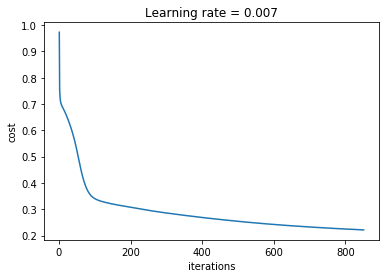

In [32]:
# Let's plot the cost
costs_df = pd.DataFrame(costs)
plt.plot(costs_df['Iteration'],costs_df['Cost'])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = " + str(learning_rate))
plt.show()

# Predict (Hold out)

In [33]:
## TO DO ##

# Create your own predict function.
# Note the number of training examples
# Turn the probabilities into 0-1 predictions
# Replace False

def predict(X, y, parameters):
    
    """ 
    Input:
    X           -- data (test set)
    parameters  -- parameters of the trained model
    
    Output:
    p -- predictions for the given dataset X
    
    """
    
    m = X.shape[1] # How many examples?
    p = np.zeros((1,m)) # Initialise probabilities to zero
    
    # Forward propagation with our test set
    network_model_t = forward_prop_1(X, parameters) # What data do we send through to predict?
    network_model_t = forward_prop_2(network_model_t)
    network_model_t = forward_prop_3(network_model_t)
    
    # Extract probabilities - where are these?
    probas = network_model_t['layer_3']['A']
    
    # Make a dataframe to generate metrics easily
    results = pd.DataFrame({'probas':probas[0], 'truth':y[0]})
    results['class'] = np.where(results.probas>0.5, 1,0)

    return results

In [34]:
# Create some predictions
results = predict(X_test, y_test, network_model)

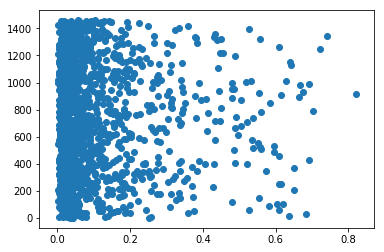

In [35]:
# Make a scatter plot of probabilities. Good check if something is wrong
plt.scatter(x=results['probas'], y=results.index)

In [66]:
# Check your prediction value counts
results['class'].value_counts()

0    1406
1      55
Name: class, dtype: int64

In [67]:
# Build some sklearn scores

#Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(y_pred=results['class'],y_true=results['truth']))

#Get classification report
print(classification_report(y_pred=results['class'],y_true=results['truth']))

# Accuracy score
print("Accuracy: ", accuracy_score(y_pred=results['class'],y_true=results['truth']))

# ROC_AUC score
print("ROC_AUC: ", roc_auc_score(y_score=results['probas'],y_true=results['truth']))

Confustion Matrix 
 [[1282   15]
 [ 124   40]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1297
           1       0.73      0.24      0.37       164

   micro avg       0.90      0.90      0.90      1461
   macro avg       0.82      0.62      0.66      1461
weighted avg       0.89      0.90      0.88      1461

Accuracy:  0.9048596851471595
ROC_AUC:  0.8476550012223331
